In [5]:
print("Hello world")

Hello world


In [6]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [7]:
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams
rcParams["figure.figsize"] = 11, 8

In [8]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cardio'),
  Text(3, 0, 'cholesterol'),
  Text(4, 0, 'gender'),
  Text(5, 0, 'gluc'),
  Text(6, 0, 'smoke')])

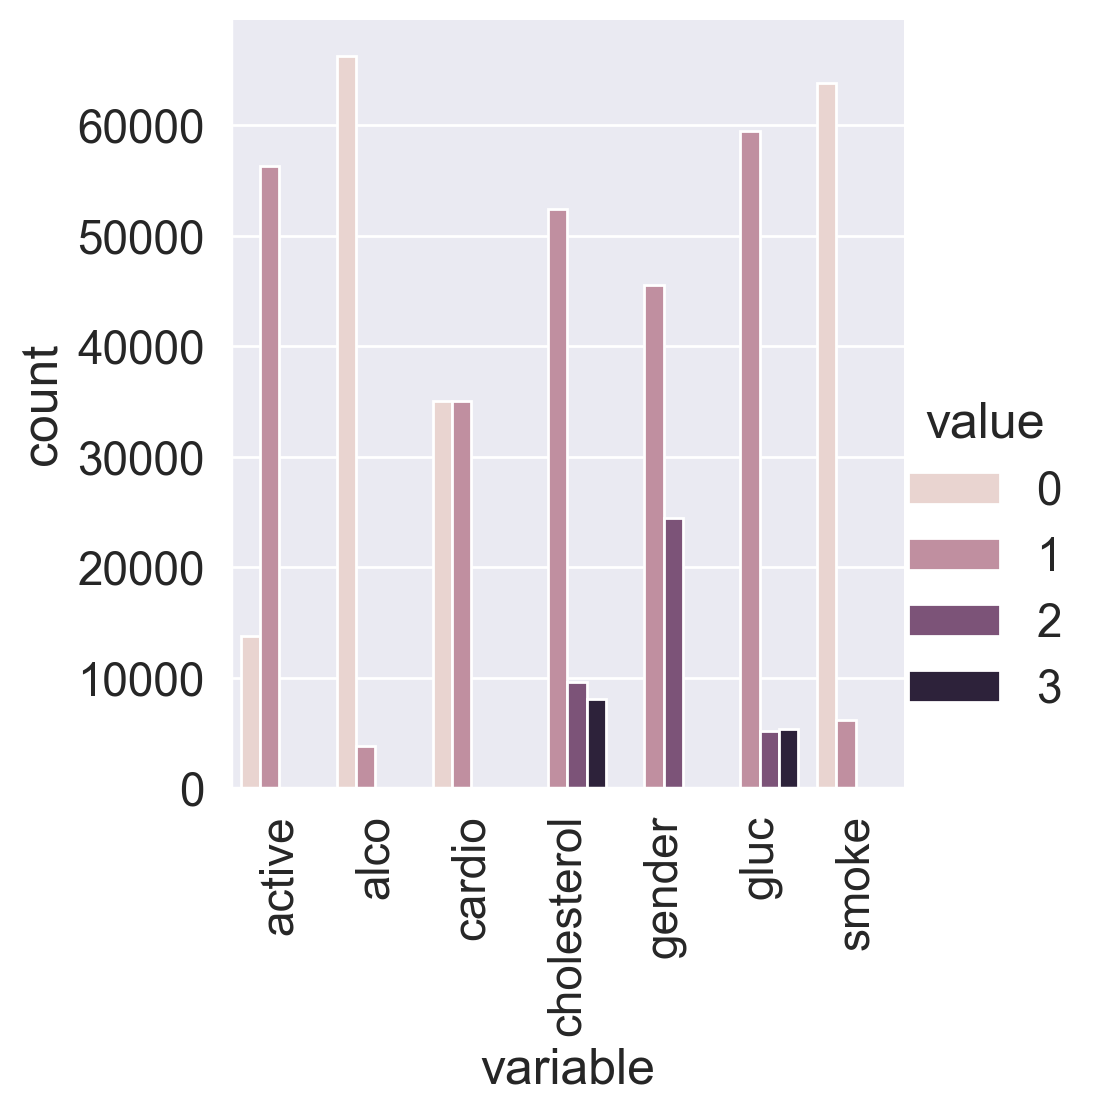

In [5]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)

df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    data=df_uniques,
    kind="bar",
)

plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cholesterol'),
  Text(3, 0, 'gender'),
  Text(4, 0, 'gluc'),
  Text(5, 0, 'smoke')])

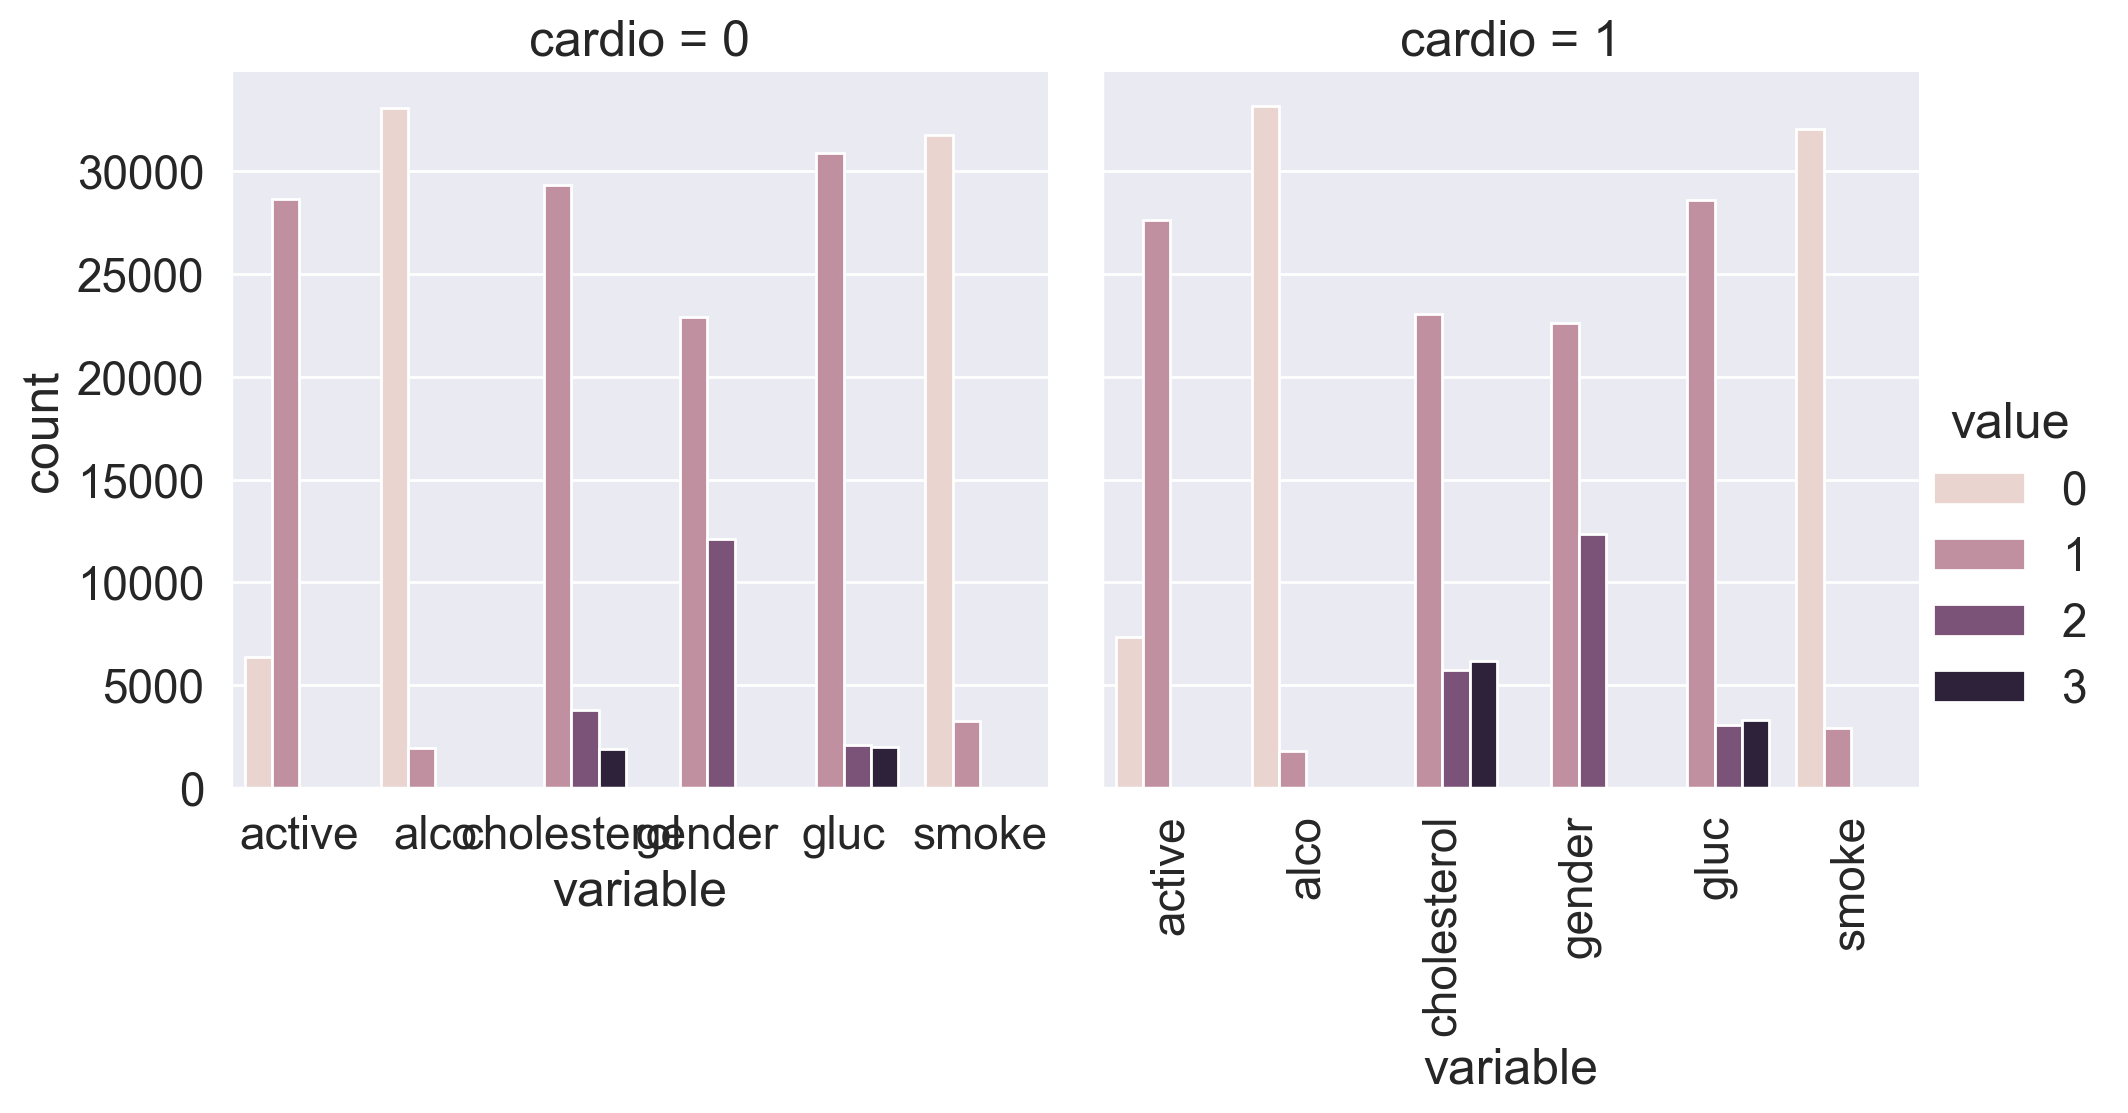

In [10]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)

df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)

plt.xticks(rotation='vertical')

In [11]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [25]:
# Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature
#  were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption 
# that men are taller on average.

females = df[df["gender"] == 1]
males = df[df["gender"] == 2]

print("# of females", females.shape[0])
print("# of males", males.shape[0])
male_mean_height =  males["height"].mean()
female_mean_height =  females["height"].mean()

print("average female height: ", female_mean_height)
print("average male height: ", male_mean_height)

# 1.1: 45530 women and 24470 men


# of females 45530
# of males 24470
average female height:  161.35561168460356
average male height:  169.94789538210054


In [31]:
female_al_count = females[females["alco"] == 1].shape[0]
male_al_count = males[males["alco"] == 1].shape[0]

print("female alco count: ", female_al_count)
print("male alco count: ", male_al_count)
#1.2 males are more likely to drink alcohol

female alco count:  1161
male alco count:  2603


In [46]:
male_smokers = males["smoke"].value_counts(normalize=True)


female_smokers = females["smoke"].value_counts(normalize=True)

gender_diff = abs(male_smokers[1] - female_smokers[1])

print("smokers gender diff", gender_diff * 100)

#1.3 20% difference

smokers gender diff 20.102390309976737


In [59]:
smokers = df[df["smoke"] == 1]
non_smokers = df[df["smoke"] == 0]

median_diff_smokers_in_months = abs(smokers["age"].median() - non_smokers["age"].median())
print("median difference of smokers and non smokers: ", median_diff_smokers_in_months / 30.44)

#1.4 ~20 months





median difference of smokers and non smokers:  19.612352168199735


In [101]:
df["age_in_years"] = df["age"] // 365.25

aged_60_to_54 = df[(df["age_in_years"] >= 60) & (df["age_in_years"] < 65)]

# df["ap_hi"]

# 1.2 ...need somehelp

In [102]:
# Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people 
# described in the task. What’s the ratio of these two fractions?



In [119]:

# weight is kg
# height is cm
df["bmi"] = df["weight"] / (df["height"] / 100) ** 2
df["bmi"].describe()

print("median bmi", df["bmi"].median())
# mean is out of bounds

female_bmi_average = df[df["gender"] == 1]["bmi"].mean()
male_bmi_average = df[df["gender"] == 2]["bmi"].mean()


print("female_bmi_average", female_bmi_average)
print("male_bmi_average", male_bmi_average)


median bmi 26.374068120774975
female_bmi_average 27.98758344183285
male_bmi_average 26.754442357289356


In [131]:
sick_median_bmi = df[df["cardio"] == 1]["bmi"].median()
healthy_median_bmi = df[df["cardio"] == 0]["bmi"].median()

print("sick_median_bmi", sick_median_bmi)
print("healthy_median_bmi", healthy_median_bmi)


sick_median_bmi 27.47138397502601
healthy_median_bmi 25.476660092044707


(0.0, 30.0)

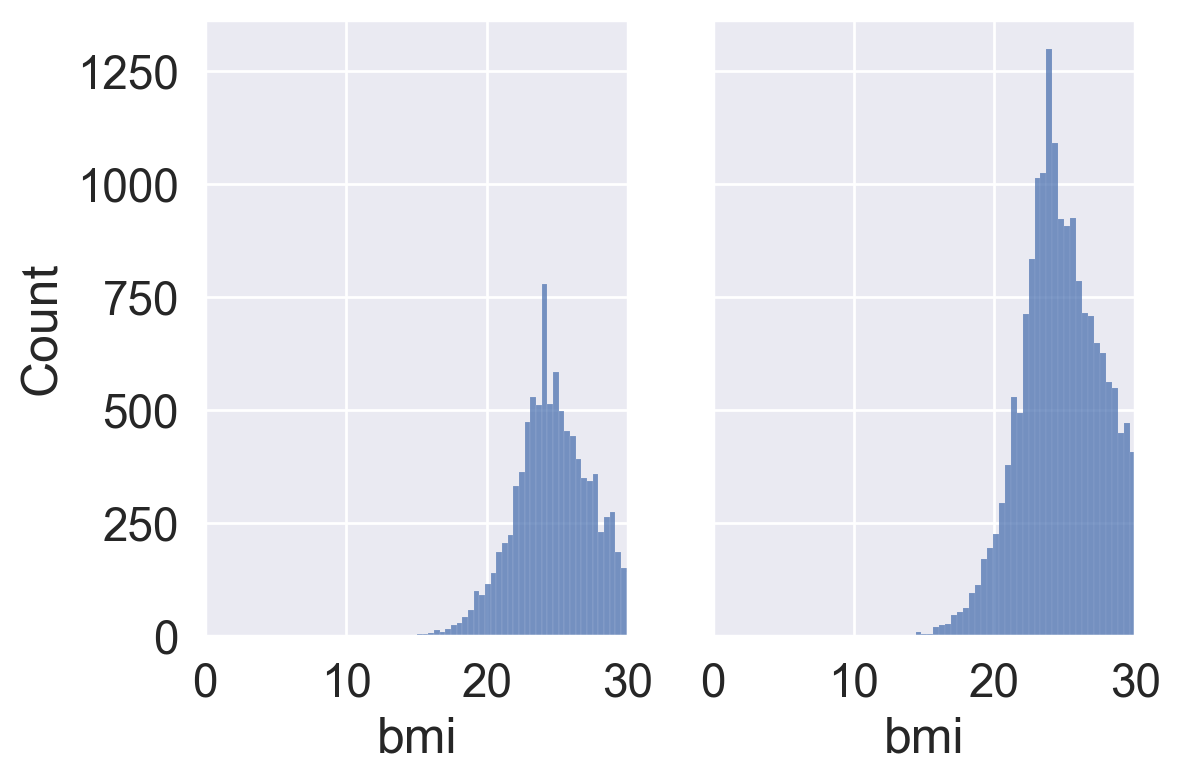

In [146]:
healthy_males = df[(df["gender"] == 2) & (df["alco"] == 0) & (df["cardio"] == 0)]["bmi"]
healthy_femalse = df[df["gender"] == 1 & (df["alco"] == 0)  & (df["cardio"] == 0)]["bmi"]


_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.histplot(data=healthy_males, ax=axes[0])
sns.histplot(data=healthy_femalse, ax=axes[1])

axes[0].set_xlim(0, 30)
axes[1].set_xlim(0, 30)


In [148]:
healthy_males.describe()

count    10748.000000
mean        25.872638
std          4.918895
min         14.609204
25%         23.306680
50%         25.102391
75%         27.755102
max        170.414201
Name: bmi, dtype: float64

In [147]:
healthy_femalse.describe()

count    22332.000000
mean        26.845407
std          5.843207
min          9.331007
25%         23.437500
50%         25.654372
75%         29.384676
max        237.768633
Name: bmi, dtype: float64

In [149]:
# F: Median BMI in the sample is within boundaries of normal values.

# T: Women’s BMI is on average higher then men’s.

# F Healthy people have higher median BMI than ill people.

# # both are similar ...male slightly less In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women
# males closer to 26.3 overall

In [155]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")

# Filter out rows where diastolic pressure is higher than systolic
df_filtered = df[df["ap_lo"] < df["ap_hi"]]

# Filter out height that is strictly less than the 2.5th percentile
height_quantile_2_5 = df_filtered["height"].quantile(0.025)
df_filtered = df_filtered[df_filtered["height"] > height_quantile_2_5]

# Filter out height that is strictly more than the 97.5th percentile
height_quantile_97_5 = df_filtered["height"].quantile(0.975)
df_filtered = df_filtered[df_filtered["height"] < height_quantile_97_5]

# Filter out weight that is strictly less than the 2.5th percentile
weight_quantile_2_5 = df_filtered["weight"].quantile(0.025)
df_filtered = df_filtered[df_filtered["weight"] > weight_quantile_2_5]

# Filter out weight that is strictly more than the 97.5th percentile
weight_quantile_97_5 = df_filtered["weight"].quantile(0.975)
df_filtered = df_filtered[df_filtered["weight"] < weight_quantile_97_5]

print("percent data left: ", df_filtered.shape[0] / df.shape[0])


percent data left:  0.8643714285714286


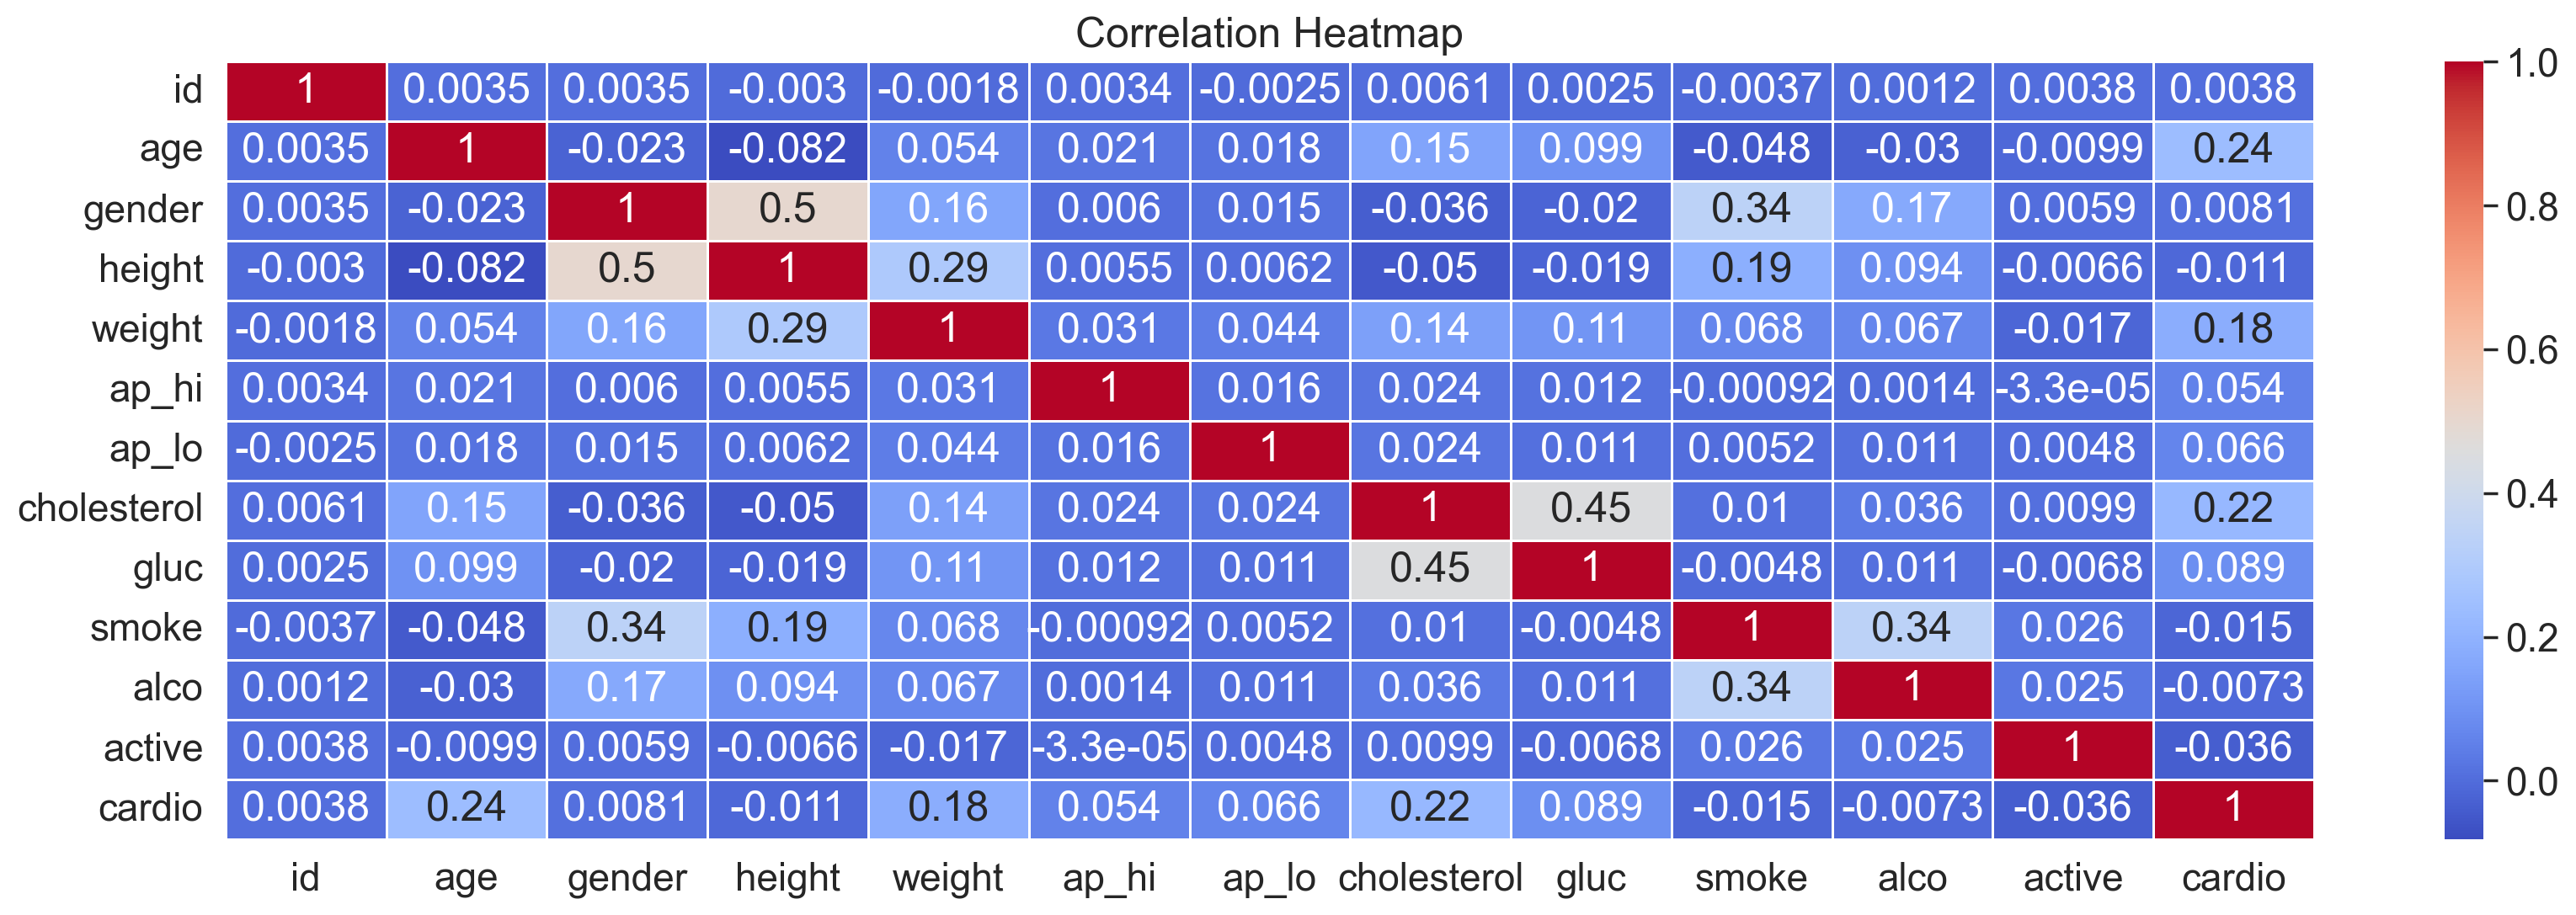

In [161]:
corr = df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [162]:
# Cardio, Cholesterol => 0.22 
# Height, Smoke => 0.19
# Smoke, Alco => 0.34 ***
# Height, Weight => 0.29


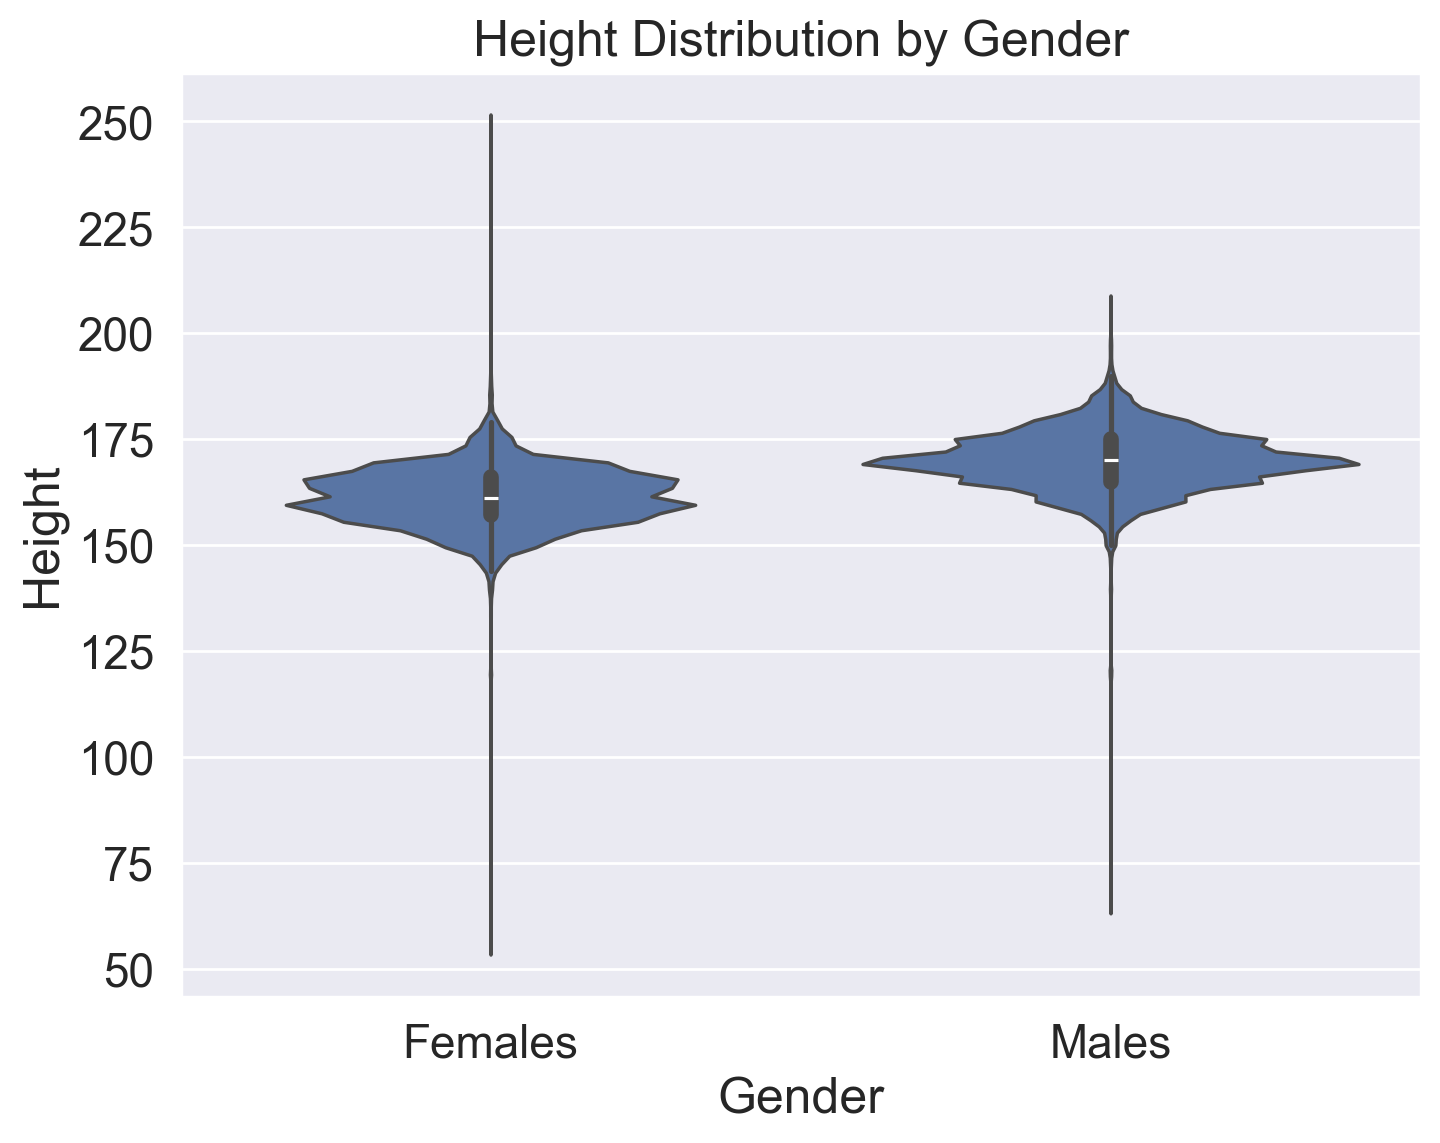

In [14]:
females = df[df["gender"] == 1]
males = df[df["gender"] == 2]
# _, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
# sns.violinplot(data=males["height"], ax=axes[0])
# sns.violinplot(data=females["height"], ax=axes[1])
# plt.show()

combined_df = pd.concat([females, males])

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="gender", y="height", data=combined_df)
plt.title('Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.xticks([0, 1], ['Females', 'Males'])
plt.show()

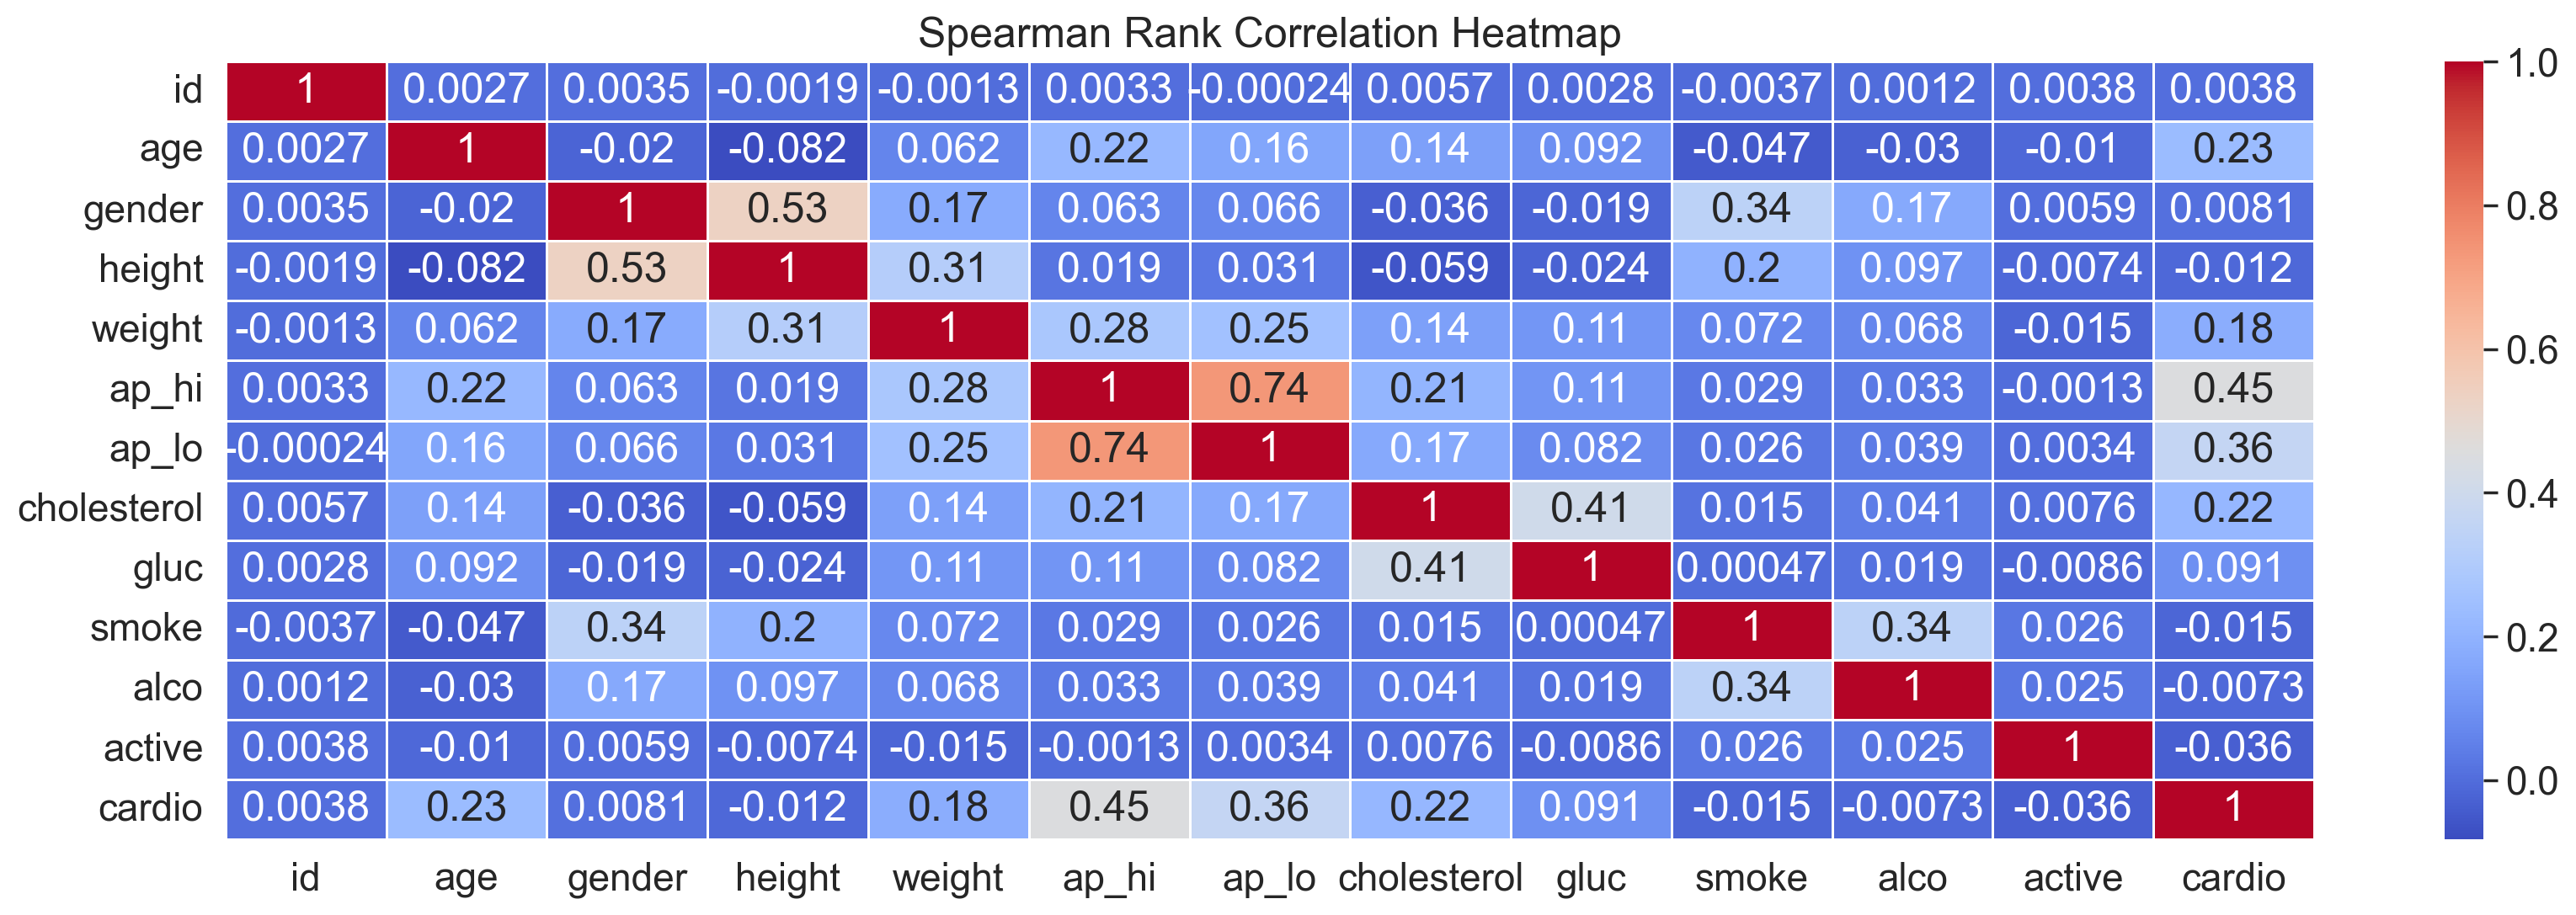

In [17]:
corr_matrix = df.corr(method="spearman")
plt.figure(figsize=(20, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

In [18]:
#height x weight => 0.31
# age x weight => 0.062
# cholesterol, gluc => 0.41
# cardio x gluc => 0.091
# ap_hi x ap_lo => 0.74 *** 
# smoke x alco => 0.34

# nature of data

In [28]:
df["ages_years"] = df["age"] // 365.25
df.groupby(["ages_years"])["cardio"].describe()

,count,mean,std,min,25%,50%,75%,max
ages_years,,,,,,,,
29.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
30.0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
39.0,1880.0,0.239362,0.426807,0.0,0.0,0.0,0.0,1.0
40.0,1524.0,0.216535,0.412018,0.0,0.0,0.0,0.0,1.0
41.0,2004.0,0.293413,0.455440,0.0,0.0,0.0,1.0,1.0
42.0,1315.0,0.304183,0.460235,0.0,0.0,0.0,1.0,1.0
43.0,2137.0,0.368273,0.482449,0.0,0.0,0.0,1.0,1.0
44.0,1408.0,0.355824,0.478932,0.0,0.0,0.0,1.0,1.0
45.0,2214.0,0.405149,0.491032,0.0,0.0,0.0,1.0,1.0


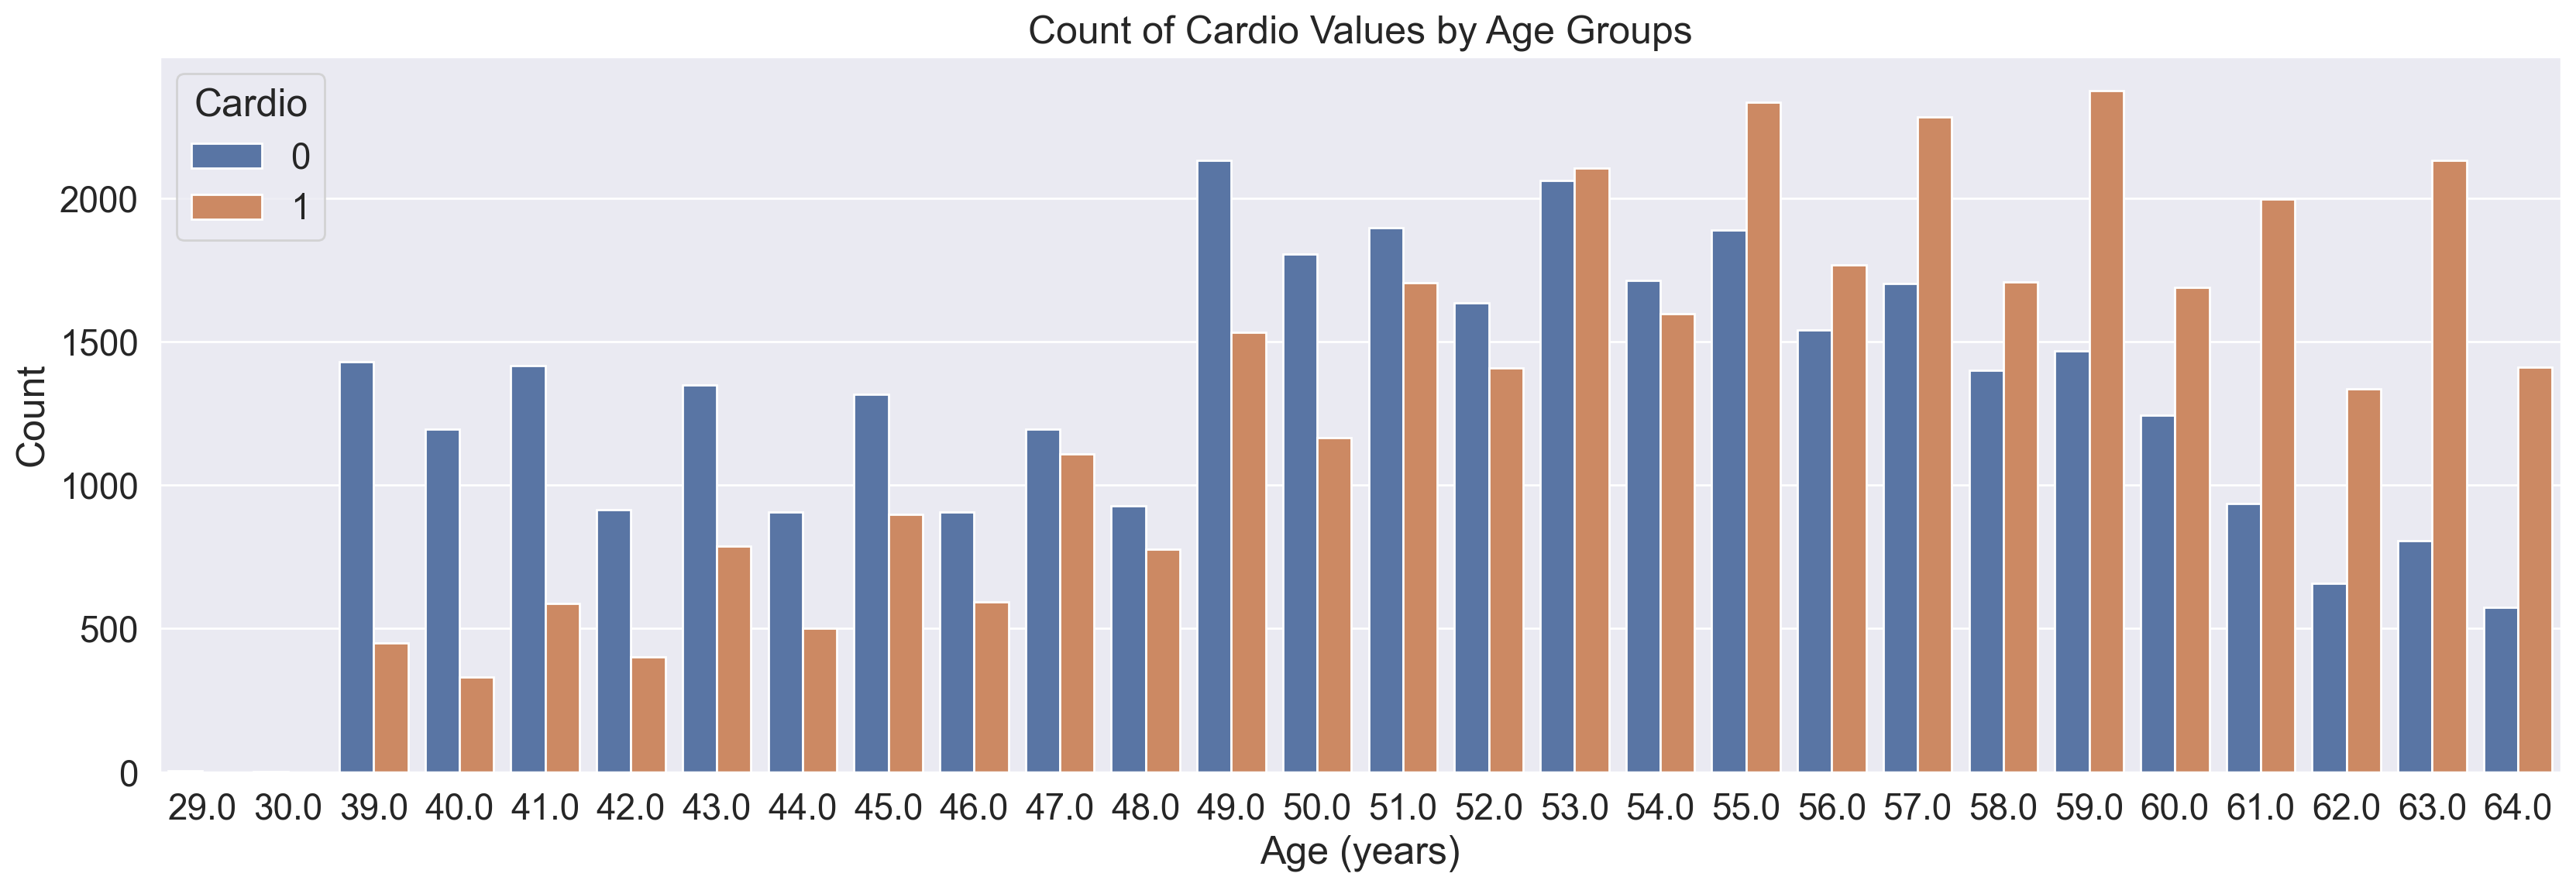

In [30]:
plt.figure(figsize=(20, 6))
sns.countplot(x="ages_years", hue="cardio", data=df)
plt.title('Count of Cardio Values by Age Groups')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(title='Cardio')
plt.show()

In [ ]:
# 55 ...cardio is more likely